<a href="https://colab.research.google.com/github/DrMalvavisco/final_project-ds_santander-f3-team6-machine_learning_in_Python/blob/Norberto/PostWork4y6Norberto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="problema"></a>
# <font color=green>Identificación del Problema</font>

Para cualquier nuevo emprendedor, existe una serie de retos que lo abruman en su aventura de iniciar un nuevo negocio. La mayor incertidumbre es poder disponer de la información necesaria que lo apoye en la toma correcta de decisiones y así mitigar los riesgos de una mala inversión de tiempo y dinero.

Para esto, sería de gran ayuda proveerle a cada emprendedor de herramientas que le aporten información ordenada, certera y fidedigna; de tal forma que le otorgue seguridad y mayor certeza de si su idea será rentable o no.

Por lo tanto, sin lugar a duda, la **ciencia de datos** es la mejor herramienta que permitiría la creación de este tipo de herramientas de apoyo para un emprendedor y su nuevo negocio.

## Investigación al respecto del problema

En esta sección ira la investigación

## Búsqueda de soluciones anteriores

En esta sección irá las soluciones previas

<a id="preguntas"></a>
# <font color=green>Planteamiento de Preguntas </font>

De acuerdo con el problema planteado anteriormente, surgieron las siguientes preguntas tanto del emprendedor como del equipo:

1.  ¿Cuál es la mejor ubicación en Guadalajara, México para abrir mi negocio de bicicletas?
2. ¿Qué tantas ventas podré obtener en los primeros meses de iniciado mi negocio?
3. ¿Cuáles son los productos más demandados por los potenciales clientes?
4. ¿Qué precios serán los más competitivos para las bicicletas?
5. ¿Qué tan frecuente un cliente querrá comprar ropa o accesorios para sus bicicletas?
6. ¿Qué tantos clientes acudirán a mi negocio por una reparación o mejora en su bicicleta?

Aunque no tenemos seguridad si podremos responder todas las preguntas planteadas, se le comentó al emprendedor que se hará un análisis de la data disponible y se evaluará que información se le puede presentar.



# Colección de Datos
Se tomo la decision de usar "Bike Buyers 1000" y "Bike Sales", dado que contienen informacion relevante a la problematica sobre la cual se esta tratando y ambos datasets se complementan, los cuales fueron encontrados en kaggle.

"Bike Buyers 1000" 
link: "https://www.kaggle.com/datasets/heeraldedhia/bike-buyers"

"Bike Sales"
link: "https://www.kaggle.com/datasets/liyingiris90/bike-sales"

## Proceso para obtener el dataset

Dado que los archivos contenidos dentro del conjunto de datos de Bike Sales estan en formato .xlsx, se uso la funcion <font color =red> *pd.read_excel* </font> de pandas.

Para Bike Buyers al ser un formato csv, se usa nuestra funcion ya conocida  <font color =red> *pd.read_csv*</font>  

Se importan las siguientes librerias...

In [ ]:
!pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from colorama import Fore
from colorama import Style
import matplotlib.pyplot as plt
sns.set()
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import KMeans

from sklearn.metrics import mean_squared_error as MSE
from statistics import mean
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from datetime import datetime
from sklearn.model_selection import TimeSeriesSplit
from statistics import mode
from sklearn.metrics import make_scorer

Se guardan los respectivos DataFrames del conjunto de datos <font color=blue> "bike sales"</font> y <font color=blue> "bike buyers"

In [ ]:
compradores = pd.read_csv("https://raw.githubusercontent.com/hvasquez28/g1-ds_santander-f2-team7-Phyton/datos-faltantes-y-correciones/Entrega_Final_Procesamiento_DanielTapia_LuisZanabria_NorbertoPena_HaroldVasquez/datasets/bike_buyers.csv")

In [ ]:
bikes = pd.read_excel('https://github.com/hvasquez28/g1-ds_santander-f2-team7-Phyton/blob/datos-faltantes-y-correciones/Entrega_Final_Procesamiento_DanielTapia_LuisZanabria_NorbertoPena_HaroldVasquez/datasets/bikes.xlsx?raw=true')
bikestores = pd.read_excel("https://github.com/hvasquez28/g1-ds_santander-f2-team7-Phyton/blob/datos-faltantes-y-correciones/Entrega_Final_Procesamiento_DanielTapia_LuisZanabria_NorbertoPena_HaroldVasquez/datasets/bikeshops.xlsx?raw=true")
orders = pd.read_excel("https://github.com/hvasquez28/g1-ds_santander-f2-team7-Phyton/blob/datos-faltantes-y-correciones/Entrega_Final_Procesamiento_DanielTapia_LuisZanabria_NorbertoPena_HaroldVasquez/datasets/orders.xlsx?raw=true")

/usr/local/lib/python3.8/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


# Exploracion de los Datasets
Procedemos a revisar cada DataFrame usando <font color=blue> .head() </font> y <font color=blue>.tail()  </font>, asi como <font color=blue> .dtypes, .columns, .shape, .loc[$n:m$] </font> (donde $n,m ∈ 𝖭$ y $n<m.$) 

In [ ]:
compradores.dtypes #Se tienen flotantes que deberian de ser enteros.
compradores.shape #Se tienen 1000 entradas y 13 columnas.
compradores.columns # ID, Marital S, Gender, Income, Children, Education, Occupation, Home Owner, Cars, Commute Distance, Region, Age, purchase bike
compradores.head() # Se observan NaNs
compradores.tail() # Se observan NaNs
c=list(compradores.columns) # Se guarda el nombre de las columnas en una lista, que sera usada mas adelante para cambiar los nombres de nuestro dataframe. 
compradores.loc[500:515] # Se observan Nans. 

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
500,15559,Married,Male,60000.0,5.0,Bachelors,Professional,Yes,1.0,2-5 Miles,North America,47.0,No
501,19235,Married,Female,50000.0,0.0,Graduate Degree,Skilled Manual,Yes,0.0,0-1 Miles,North America,34.0,No
502,15275,Married,Male,40000.0,0.0,Partial College,Skilled Manual,Yes,1.0,5-10 Miles,North America,29.0,No
503,20339,Married,Female,130000.0,1.0,Bachelors,Management,Yes,4.0,2-5 Miles,North America,44.0,Yes
504,25405,Married,Male,70000.0,2.0,Bachelors,Skilled Manual,Yes,1.0,2-5 Miles,North America,38.0,Yes
505,15940,Married,Male,100000.0,4.0,Partial College,Professional,Yes,4.0,0-1 Miles,North America,40.0,No
506,25074,Married,Female,70000.0,4.0,Bachelors,Professional,Yes,2.0,2-5 Miles,North America,42.0,Yes
507,24738,Married,Female,40000.0,1.0,Partial College,Clerical,Yes,1.0,1-2 Miles,North America,51.0,Yes
508,16337,Married,Male,60000.0,0.0,Partial College,Skilled Manual,No,2.0,1-2 Miles,North America,29.0,No
509,24357,Married,Male,NaN,3.0,Bachelors,Professional,Yes,1.0,2-5 Miles,North America,48.0,Yes


In [ ]:
bikes.dtypes # El unico data que parecer ser incorrecto es el precio, que es de tipo int. 
bikes.shape # Se tienen un total de 97 filas con 5 columnas
bikes.columns # bike.id, model, category1, category2, frame, price. Se renombraran columnas.
bikes.head() #No se observan Nans.
bikes.tail() #No se observan Nans.
bc=list(bikes.columns)
bikes.loc[46:58] # No se observan Nans de forma aleatoria

,bike.id,model,category1,category2,frame,price
46,47,Jekyll Carbon 1,Mountain,Over Mountain,Carbon,7990
47,48,Jekyll Carbon 2,Mountain,Over Mountain,Carbon,6070
48,49,Jekyll Carbon 3,Mountain,Over Mountain,Carbon,3840
49,50,Jekyll Carbon 4,Mountain,Over Mountain,Carbon,3200
50,51,Trigger Carbon 1,Mountain,Over Mountain,Carbon,8200
51,52,Trigger Carbon 2,Mountain,Over Mountain,Carbon,5970
52,53,Trigger Carbon 3,Mountain,Over Mountain,Carbon,3730
53,54,Trigger Carbon 4,Mountain,Over Mountain,Carbon,3200
54,55,Scalpel-Si Black Inc.,Mountain,Cross Country Race,Carbon,12790
55,56,Scalpel-Si Race,Mountain,Cross Country Race,Carbon,9060


In [ ]:
bikestores.dtypes # Todos los datos tienen el tipo correcto.
bikestores.shape # Se tienen un total de 30 filas con 6 columnas
bikestores.columns # bikeshop.id , bikeshop.name, bikeshop.city, bikeshop.state, latitude , longitude. Se renombraran columnas.
bikestores.head() # No se observan Nans.
bikestores.tail() # No se observan Nans.
bs=list(bikestores.columns)
bikestores.loc[10:25] #No se observan Nans. 

,bikeshop.id,bikeshop.name,bikeshop.city,bikeshop.state,latitude,longitude
10,11,New York Cycles,New York,NY,40.712784,-74.005941
11,12,Dallas Cycles,Dallas,TX,32.776664,-96.796988
12,13,Oklahoma City Race Equipment,Oklahoma City,OK,35.467560,-97.516428
13,14,Albuquerque Cycles,Albuquerque,NM,35.085334,-106.605553
14,15,Austin Cruisers,Austin,TX,30.267153,-97.743061
15,16,Phoenix Bi-peds,Phoenix,AZ,33.448377,-112.074037
16,17,Las Vegas Cycles,Las Vegas,NV,36.169941,-115.139830
17,18,Los Angeles Cycles,Los Angeles,CA,34.052234,-118.243685
18,19,San Francisco Cruisers,San Francisco,CA,37.774929,-122.419416
19,20,Portland Bi-peds,Portland,OR,45.523062,-122.676482


In [ ]:
orders.dtypes # Se observa que order.id, order.line, customer.id y product.id son de tipo flotante cuando deberian de ser de tipo entero.
orders.shape # Tiene un total de 15644 filas y 7 columnas. 
orders.columns #'Unnamed: 0', 'order.id', 'order.line', 'order.date', 'customer.id','product.id' y 'quantity'. Se renombraran las columnas.
oc=list(orders.columns) 
orders.head() #No se observan Nans, por otro lado, se observa que la columna 'Unnamed: 0' esta repetida. 
orders.tail() # No se observan Nans. 
orders.loc[10468:10480] # no se observan Nans.

,Unnamed: 0,order.id,order.line,order.date,customer.id,product.id,quantity
10468,10469,1339.0,1.0,2014-07-08,25.0,12.0,1.0
10469,10470,1339.0,2.0,2014-07-08,25.0,61.0,1.0
10470,10471,1339.0,3.0,2014-07-08,25.0,72.0,1.0
10471,10472,1339.0,4.0,2014-07-08,25.0,17.0,1.0
10472,10473,1339.0,5.0,2014-07-08,25.0,42.0,2.0
10473,10474,1339.0,6.0,2014-07-08,25.0,91.0,1.0
10474,10475,1339.0,7.0,2014-07-08,25.0,50.0,1.0
10475,10476,1339.0,8.0,2014-07-08,25.0,28.0,1.0
10476,10477,1339.0,9.0,2014-07-08,25.0,39.0,1.0
10477,10478,1339.0,10.0,2014-07-08,25.0,87.0,8.0


Conociendo los valores de algunas columnas de algunos dataSets

In [ ]:
orders['product.id'].unique()

array([48., 52., 76.,  2., 50.,  1.,  4., 34., 26., 96., 66., 35., 72.,
       45., 39., 87., 31., 15., 10., 65., 55.,  7., 67., 61., 18., 42.,
       56., 93., 29., 13., 16., 36., 19., 11., 23., 43., 27., 49., 28.,
       32., 22., 63., 40., 37.,  8., 57., 69.,  3.,  5., 84., 90., 88.,
       44., 73., 91., 95., 94., 38., 21., 64.,  9., 14., 85., 79., 78.,
       77., 51., 33., 74., 24., 71., 92., 30.,  6., 97., 12., 20., 70.,
       89., 80., 47., 58., 25., 75., 62., 60., 54., 82., 53., 46., 41.,
       83., 86., 81., 68., 17., 59.])

In [ ]:
orders['customer.id'].unique()

array([ 2., 10.,  6., 22.,  8., 16.,  9., 25., 20., 19.,  7., 14., 13.,
        5., 17., 21.,  3., 30., 24., 11., 15., 28.,  1., 27., 29., 18.,
       26.,  4., 23., 12.])

In [ ]:
bikes['bike.id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97])

In [ ]:
bikestores['bikeshop.id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

#Renombramos las columnas en los DataFrames.

Se crean diccionarios para cambiar el nombre de las columnas de nuestros data frames.

In [ ]:
comp_names = {c[0]:'id_comprador',
              c[1]:'estado_civil',
              c[2]:'genero',
              c[3]:'sueldo',
              c[4]:'hijos',
              c[5]:'educacion',
              c[6]:"profesion",
              c[7]:"posee_casa",
              c[8]:'autos',
              c[9]:'distancia_d_viaje',
              c[10]:'region',
              c[11]:'edad',
              c[12]:'bicicleta_adquirida'}

bike_names = {bc[0]:'id_bicicleta',
              bc[1]:'modelo',
              bc[2]:'categoria_1',
              bc[3]:'categoria_2',
              bc[4]:'aleacion',
              bc[5]:'precio'}

stores_nombres = {bs[0]:'id_tienda',
                  bs[1]:'nombre_tienda',
                  bs[2]:'ciudad',
                  bs[3]:'estado',
                  bs[4]:'latitud',
                  bs[5]:'longitud'}

orders_nombres = {oc[1]:'id_orden',
                  oc[2]:'orden_line',
                  oc[3]:'orden_date',
                  oc[4]:'id_tienda',
                  oc[5]:'id_bicicleta',
                  oc[6]:'numero_items'}

Nos percatamos del hecho, de que la columna customer_id es realmente el id_tienda. Dado que ambas coinciden con el numero de entradas y los valores asociados a cada una. 

In [ ]:
compradores = compradores.rename(columns=comp_names)
ordenes = orders.rename(columns=orders_nombres)
bicicletas = bikes.rename(columns=bike_names)
tiendas =  bikestores.rename(columns=stores_nombres)

# Eliminación de NaNs

EPara tener unos DataFrames mas limpios, se eliminan los NaNs

In [ ]:
# Se crean las siguientes funciones para determinar NaNs entre los distintos DataFrames.
def numero_nans(dataframe):
    print(dataframe.isna().sum())

def porcentaje_nans(dataframe):
  print(dataframe.isna().sum()/len(dataframe)*100)

In [ ]:
porcentaje_nans(ordenes)
porcentaje_nans(tiendas)
porcentaje_nans(bicicletas)
porcentaje_nans(compradores) #El unico DataFrame con Nans presentes, es el de Compradores. 
numero_nans(compradores)

Unnamed: 0      0.0
id_orden        0.0
orden_line      0.0
orden_date      0.0
id_tienda       0.0
id_bicicleta    0.0
numero_items    0.0
dtype: float64
id_tienda        0.0
nombre_tienda    0.0
ciudad           0.0
estado           0.0
latitud          0.0
longitud         0.0
dtype: float64
id_bicicleta    0.0
modelo          0.0
categoria_1     0.0
categoria_2     0.0
aleacion        0.0
precio          0.0
dtype: float64
id_comprador           0.0
estado_civil           0.7
genero                 1.1
sueldo                 0.6
hijos                  0.8
educacion              0.0
profesion              0.0
posee_casa             0.4
autos                  0.9
distancia_d_viaje      0.0
region                 0.0
edad                   0.8
bicicleta_adquirida    0.0
dtype: float64
id_comprador            0
estado_civil            7
genero                 11
sueldo                  6
hijos                   8
educacion               0
profesion               0
posee_casa           

Se llanan las Nans. 

In [ ]:
compradores[['hijos','autos']] = compradores[['hijos','autos']].fillna(0)
compradores['estado_civil'] = compradores['estado_civil'].fillna('Single')
compradores['posee_casa'] = compradores['posee_casa'].fillna('No')
compradores =compradores.dropna(how='any')
compradores = compradores.reset_index(drop=True) 
numero_nans(compradores)

id_comprador           0
estado_civil           0
genero                 0
sueldo                 0
hijos                  0
educacion              0
profesion              0
posee_casa             0
autos                  0
distancia_d_viaje      0
region                 0
edad                   0
bicicleta_adquirida    0
dtype: int64


#Se procede a cambiar el tipo de dato de cada DataFrame.

Para esto crearemos diccionarios con los nuevos tipos de datos y aplicaremos la funcion de pandas *.astype()*

In [ ]:
print(ordenes.dtypes) # Tiene flotantes que deben de ser enteros. 
print(tiendas.dtypes) # Tiendas tiene todos los tipos de datos correctos.
print(compradores.dtypes) # Tiene flotantes que deben de ser enteros. 
print(bicicletas.dtypes) # Tiene un int que deberia de ser flotante. 

Unnamed: 0               int64
id_orden               float64
orden_line             float64
orden_date      datetime64[ns]
id_tienda              float64
id_bicicleta           float64
numero_items           float64
dtype: object
id_tienda          int64
nombre_tienda     object
ciudad            object
estado            object
latitud          float64
longitud         float64
dtype: object
id_comprador             int64
estado_civil            object
genero                  object
sueldo                 float64
hijos                  float64
educacion               object
profesion               object
posee_casa              object
autos                  float64
distancia_d_viaje       object
region                  object
edad                   float64
bicicleta_adquirida     object
dtype: object
id_bicicleta     int64
modelo          object
categoria_1     object
categoria_2     object
aleacion        object
precio           int64
dtype: object


In [ ]:
c=list(compradores.columns)
oc=list(ordenes.columns)
nuevos_types_compra = {c[4]:int,
         c[8]:int,
         c[11]:int}

new_types_orders ={oc[1]:int,
                   oc[2]:int,
                   oc[4]:int,
                   oc[5]:int,
                   oc[6]:int}
compradores = compradores.astype(nuevos_types_compra)

In [ ]:
ordenes = ordenes.astype(new_types_orders)
compradores = compradores.astype(nuevos_types_compra)
bicicletas['precio'] = bicicletas['precio'].astype(float) # Se usa este metodo, dado que solo hay que cambiar de tipo de dato a una variable.

##Procederemos a eliminar la columna 'Unnamed: 0' del DataFrame ordenes

In [ ]:
ordenes.drop(columns='Unnamed: 0',inplace=True)

#Procedemos a unir las diferentes tablas para posteriormente realizar las agregaciones adecuadas. 

###Ordenes y Bicicletas.

In [ ]:
or_bikes = pd.merge(ordenes,bicicletas,left_on='id_bicicleta',right_index=True)
or_bikes.drop(columns=['id_bicicleta_x','id_bicicleta_y'], inplace=True)
or_bikes

,id_bicicleta,id_orden,orden_line,orden_date,id_tienda,numero_items,modelo,categoria_1,categoria_2,aleacion,precio
0,48,1,1,2011-01-07,2,1,Jekyll Carbon 3,Mountain,Over Mountain,Carbon,3840.0
120,48,23,1,2011-02-04,8,1,Jekyll Carbon 3,Mountain,Over Mountain,Carbon,3840.0
344,48,44,13,2011-02-28,16,1,Jekyll Carbon 3,Mountain,Over Mountain,Carbon,3840.0
374,48,48,5,2011-03-03,30,1,Jekyll Carbon 3,Mountain,Over Mountain,Carbon,3840.0
464,48,66,2,2011-03-23,6,1,Jekyll Carbon 3,Mountain,Over Mountain,Carbon,3840.0
...,...,...,...,...,...,...,...,...,...,...,...
14839,59,1894,4,2015-09-08,4,1,Scalpel-Si Carbon 4,Mountain,Cross Country Race,Carbon,4260.0
14927,59,1915,1,2015-09-25,10,1,Scalpel-Si Carbon 4,Mountain,Cross Country Race,Carbon,4260.0
15180,59,1938,9,2015-10-29,10,1,Scalpel-Si Carbon 4,Mountain,Cross Country Race,Carbon,4260.0
15569,59,1986,27,2015-12-17,28,1,Scalpel-Si Carbon 4,Mountain,Cross Country Race,Carbon,4260.0


###Tiendas y Ordenes

In [ ]:
str_orders = pd.merge(ordenes,tiendas,left_on='id_tienda',right_index=True)
str_orders.drop(columns=['id_tienda_x','id_tienda_y'])

,id_tienda,id_orden,orden_line,orden_date,id_bicicleta,numero_items,nombre_tienda,ciudad,estado,latitud,longitud
0,2,1,1,2011-01-07,48,1,Columbus Race Equipment,Columbus,OH,39.961176,-82.998794
1,2,1,2,2011-01-07,52,1,Columbus Race Equipment,Columbus,OH,39.961176,-82.998794
94,2,19,1,2011-01-28,66,2,Columbus Race Equipment,Columbus,OH,39.961176,-82.998794
95,2,19,2,2011-01-28,61,1,Columbus Race Equipment,Columbus,OH,39.961176,-82.998794
152,2,28,1,2011-02-10,47,1,Columbus Race Equipment,Columbus,OH,39.961176,-82.998794
...,...,...,...,...,...,...,...,...,...,...,...
14693,12,1870,1,2015-08-24,95,1,Oklahoma City Race Equipment,Oklahoma City,OK,35.467560,-97.516428
14719,12,1879,1,2015-08-26,93,3,Oklahoma City Race Equipment,Oklahoma City,OK,35.467560,-97.516428
14814,12,1891,1,2015-09-07,31,1,Oklahoma City Race Equipment,Oklahoma City,OK,35.467560,-97.516428
14815,12,1891,2,2015-09-07,30,1,Oklahoma City Race Equipment,Oklahoma City,OK,35.467560,-97.516428


##Tiendas, Bicicletas y Ordenes

Para obtener las verdaderas ganancias por cada bicicleta se crea una nueva columna llamada total. 

In [ ]:
total_vendido = or_bikes['numero_items']*or_bikes['precio']
or_bikes['total'] = total_vendido
or_bikes

,id_bicicleta,id_orden,orden_line,orden_date,id_tienda,numero_items,modelo,categoria_1,categoria_2,aleacion,precio,total
0,48,1,1,2011-01-07,2,1,Jekyll Carbon 3,Mountain,Over Mountain,Carbon,3840.0,3840.0
120,48,23,1,2011-02-04,8,1,Jekyll Carbon 3,Mountain,Over Mountain,Carbon,3840.0,3840.0
344,48,44,13,2011-02-28,16,1,Jekyll Carbon 3,Mountain,Over Mountain,Carbon,3840.0,3840.0
374,48,48,5,2011-03-03,30,1,Jekyll Carbon 3,Mountain,Over Mountain,Carbon,3840.0,3840.0
464,48,66,2,2011-03-23,6,1,Jekyll Carbon 3,Mountain,Over Mountain,Carbon,3840.0,3840.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14839,59,1894,4,2015-09-08,4,1,Scalpel-Si Carbon 4,Mountain,Cross Country Race,Carbon,4260.0,4260.0
14927,59,1915,1,2015-09-25,10,1,Scalpel-Si Carbon 4,Mountain,Cross Country Race,Carbon,4260.0,4260.0
15180,59,1938,9,2015-10-29,10,1,Scalpel-Si Carbon 4,Mountain,Cross Country Race,Carbon,4260.0,4260.0
15569,59,1986,27,2015-12-17,28,1,Scalpel-Si Carbon 4,Mountain,Cross Country Race,Carbon,4260.0,4260.0


In [ ]:
str_or_bks = pd.merge(or_bikes,tiendas,left_on='id_tienda',right_index=True)
str_or_bks.drop(columns=['id_tienda_x','id_tienda_y'],inplace=True)
str_or_bks


,id_tienda,id_bicicleta,id_orden,orden_line,orden_date,numero_items,modelo,categoria_1,categoria_2,aleacion,precio,total,nombre_tienda,ciudad,estado,latitud,longitud
0,2,48,1,1,2011-01-07,1,Jekyll Carbon 3,Mountain,Over Mountain,Carbon,3840.0,3840.0,Columbus Race Equipment,Columbus,OH,39.961176,-82.998794
1001,2,48,132,6,2011-05-13,1,Jekyll Carbon 3,Mountain,Over Mountain,Carbon,3840.0,3840.0,Columbus Race Equipment,Columbus,OH,39.961176,-82.998794
3830,2,48,507,2,2012-06-26,1,Jekyll Carbon 3,Mountain,Over Mountain,Carbon,3840.0,3840.0,Columbus Race Equipment,Columbus,OH,39.961176,-82.998794
3990,2,48,528,18,2012-07-16,1,Jekyll Carbon 3,Mountain,Over Mountain,Carbon,3840.0,3840.0,Columbus Race Equipment,Columbus,OH,39.961176,-82.998794
5358,2,48,691,13,2013-02-05,1,Jekyll Carbon 3,Mountain,Over Mountain,Carbon,3840.0,3840.0,Columbus Race Equipment,Columbus,OH,39.961176,-82.998794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4354,15,86,564,10,2012-08-15,1,Habit 5,Mountain,Trail,Aluminum,2340.0,2340.0,Phoenix Bi-peds,Phoenix,AZ,33.448377,-112.074037
4348,15,17,564,4,2012-08-15,2,CAAD8 105,Road,Elite Road,Aluminum,1410.0,2820.0,Phoenix Bi-peds,Phoenix,AZ,33.448377,-112.074037
7698,15,17,976,13,2013-08-14,1,CAAD8 105,Road,Elite Road,Aluminum,1410.0,1410.0,Phoenix Bi-peds,Phoenix,AZ,33.448377,-112.074037
13955,15,17,1756,3,2015-06-08,1,CAAD8 105,Road,Elite Road,Aluminum,1410.0,1410.0,Phoenix Bi-peds,Phoenix,AZ,33.448377,-112.074037


#Postwork4 Regresion 

In [ ]:
global y_acum
y_ac = or_bikes.groupby('orden_date')['total'].sum()
y_ac.index = pd.to_datetime(y_ac.index)
y_ac = y_ac.to_frame()
y_acum = y_ac.groupby([pd.Grouper(freq='W-MON')])['total'].sum()
y_acum = y_acum.to_frame()

In [ ]:
y_acum.rename(columns={'total':'y'},inplace=True)

In [ ]:
best_data = or_bikes.groupby('modelo')['total'].sum().sort_values(ascending=False)
best_bikes = best_data.index
bikess = list(best_bikes)

In [ ]:
best_data_tiendas = str_or_bks.groupby('nombre_tienda')['total'].sum().sort_values(ascending=False)
best_tiendas = best_data_tiendas.index
print(best_data_tiendas)
tiendasss = list(best_tiendas)

In [ ]:
def format(skus,sku,i): #1 bicis, 2 tiendas
  m = pd.DataFrame(columns=['date','y'])
  if i==1:
    b1 = skus[ skus.modelo == (sku)]
  if i==2:
    b1 = skus[ skus.nombre_tienda == (sku)]
  m['date'] = pd.to_datetime(b1['orden_date'])
  
  m['y'] = b1['total']
  m.set_index('date',inplace=True)
  m_2 = m.groupby([pd.Grouper(freq='W-MON')])['y'].sum()
  return m_2.to_frame()

In [ ]:
def spliter(xyz,fecha):
  split_date = fecha
  data_train = xyz.loc[xyz.index <= split_date].copy()
  data_test = xyz.loc[xyz.index > split_date].copy()
  data_train['y'] = data_train.fillna(data_train['y'].median())
  data_test['y'] = data_test.fillna(data_test['y'].median())
  return data_train, data_test

In [ ]:
fecha_final = '2014-12-29'

##Metricas y Matrices XGB

###Funcion Limitada de Mape y Mape normal
>Entiendo el por que de los condicionales.

**Mape**
<font size = 6>
$\sum_{i=1}^{n} \frac{|A_i-F_i|}{|A_i|}$
<font>

**Wape**
<font size = 6>
$ \frac{ \sum_{i=1}^{n}|A_i-F_i|}{\sum_{i=1}^{n} |A_i|}$
<font>

In [ ]:
def mape(data=None,yhat=None,y=None):
  return abs(abs(data[yhat]-data[y]) / data[y]) if data[y] != 0 else 1

In [ ]:
def mape_limit(data=None ,yhat=None , y=None ):

  diff = abs(data[yhat] - data[y] )/data[y] if data[y] != 0 else 1
  
  if diff>1:
    return 1
  elif diff<0:
    return 0
  else:
    return diff

###Matrices Features

In [ ]:
def features_from_time (y):
  x = pd.DataFrame()
  x['date'] = y.index
  x['hour'] = x['date'].dt.hour
  x['dayofweek'] = x['date'].dt.dayofweek
  x['quarter'] = x['date'].dt.quarter
  x['month'] = x['date'].dt.month
  x['year'] = x['date'].dt.year
  x['dayofyear'] = x['date'].dt.dayofyear
  x['dayofmonth'] = x['date'].dt.day
  x['weekofyear'] = x['date'].dt.weekofyear
  x.set_index('date',inplace=True)
  return x, y

In [ ]:
def features_and_target(d_train,d_test):
  x_ft_train, y_train = features_from_time(d_train)
  x_ft_test, y_test = features_from_time(d_test)
  return x_ft_train, y_train, x_ft_test, y_test

###Para predecir 202i (2022)

In [ ]:
def features_from_time_2i(y):
  x = pd.DataFrame()
  x['date'] = y
  x['hour'] = x['date'].dt.hour
  x['dayofweek'] = x['date'].dt.dayofweek
  x['quarter'] = x['date'].dt.quarter
  x['month'] = x['date'].dt.month
  x['year'] = x['date'].dt.year
  x['dayofyear'] = x['date'].dt.dayofyear
  x['dayofmonth'] = x['date'].dt.day
  x['weekofyear'] = x['date'].dt.weekofyear
  x.set_index('date',inplace=True)
  return x

In [ ]:
def preds202i(d22,pred):
  resultados = pd.DataFrame()
  resultados['ds'] = d22
  resultados['y_xgb'] = pred
  return resultados

###Metrica ~ Accuracy y Mape_test

In [ ]:
##########  METRICA
def Metrica_custom(d_test,pred,y_acum):
  resultados = pd.DataFrame()
  resultados['ds'] = d_test.index
  resultados['yhat'] = pred
  resultados['y'] = d_test.to_numpy() 
  resultados['mape_test'] = resultados.apply(mape,args=['yhat','y'],axis=1)
  resultados['mape_limit_test'] = resultados.apply( mape_limit , args=['yhat','y'], axis=1)
  resultados = pd.merge(resultados,y_acum,left_on='ds',right_index=True).rename(columns={"y_x":'y'} )#,"y_y"='y_acum'
  resultados.rename(columns={"y_y":'y_acum'},inplace=True)
  resultados['y_weighted'] = resultados['y'] / resultados['y_acum']
  resultados['mape_weighted'] = resultados['y_weighted'] * resultados['mape_limit_test']
  resultados['accuracy'] =  100 - ((resultados['mape_weighted']*100)/resultados['y_weighted'])
  return sum(resultados['accuracy'].fillna(0))/resultados.shape[0] , sum(resultados['mape_test'])/resultados.shape[0], np.sqrt(MSE(d_test.to_numpy(), pred)), resultados

In [ ]:
##########  METRICA
def Metrica_wape(d_test,pred):
  resultados = pd.DataFrame()
  resultados['ds'] = d_test.index
  resultados['yhat'] = abs(pred)
  resultados['y'] = d_test.to_numpy() 
  resultados['mape_test'] = resultados.apply(mape,args=['yhat','y'],axis=1)
  resultados['mape_limit_test'] = resultados.apply( mape_limit , args=['yhat','y'], axis=1)
  resultados = pd.merge(resultados,y_acum,left_on='ds',right_index=True).rename(columns={"y_x":'y'} )#,"y_y"='y_acum'
  resultados.rename(columns={"y_y":'y_acum'},inplace=True)
  resultados['y_weighted'] = resultados['y'] / resultados['y_acum']
  resultados['mape_weighted'] = resultados['y_weighted'] * resultados['mape_limit_test']
  resultados['accuracy'] =  100 - ((resultados['mape_weighted']*100)/resultados['y_weighted'])
  return sum(resultados['accuracy'].fillna(0))/resultados.shape[0] 

###Train y Test Tables

In [ ]:
def test_sett(b2,skt):
  train_test_table = pd.DataFrame(columns=['Train_set','Test_set'])
  d_train, d_test = spliter(b2,fecha_final)
  lista_sku = np.full(len(b2), skt)
  arr0 = [0] * len(d_train)
  for i in range(len(d_test)):
    arr0.append(d_test['y'][i])
  train_test_table['Train_set'] = b2['y']
  train_test_table['Test_set'] = arr0
  o = train_test_table.reset_index()
  o.insert(0,'sku',lista_sku)
  return o #Regresa una tabla con el conjunto de Entrenamiento y Testeo.

##Polinomial.GridSearchParam

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

In [ ]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [ ]:
tabla_regresion_polinomial = []

In [ ]:
param_grid = {'polynomialfeatures__degree': [2],
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}
my_scorer = make_scorer(Metrica_wape, greater_is_better=True)

for bke in bikess:
  b2 = format(or_bikes,bke,1)
  d_train, d_test = spliter(b2,fecha_final)
  x_ft_train, y_train, x_ft_test, y_test = features_and_target(d_train,d_test)
  lista_bike = np.full(len(d_test), bke)
  print(lista_bike)
  poly_grid = GridSearchCV(PolynomialRegression(), param_grid, cv=3, scoring='neg_mean_squared_error')

  poly_grid.fit(x_ft_train,y_train)

  p = poly_grid.predict(x_ft_test)

  wp_poli, mp_poli, rs_poli, tabla_poli_i = Metrica_custom(d_test,abs(p),y_acum)
  lista_bike = np.full(len(d_test), bke)
  tabla_poli_i.insert(0,'bike',lista_bike)
  print(tabla_poli_i)
  tabla_regresion_polinomial.append( tabla_poli_i )
m = pd.concat( tabla_regresion_polinomial )

##XGB.GridSearchParam

In [ ]:
xgb_ibp_results_params = pd.DataFrame(columns=["eta","max_depth","num_estimators",'alpha','XGB Wape', 'XGB Mape','XGB Rmse'],index=bikess[0:40]) #Parametros. 

tabla_xgb = [] ### Tablas Generales de Cada SKu

XGB_Wape = []
XGB_Mape = []
XGB_Rmse = []

et = []
n_st = []
mx_d = []
alpaa =[]

In [ ]:
xgb_acc_means = pd.DataFrame(columns=['Mean Wape Eval_set', 'Wape Test Set'], index=bikess[0:50])
tabla_xgb = [] ### Tablas Generales de Cada SKu
train_test_tables = []
xgb_wape_mean = []
xgb_wape_mmean = []

In [ ]:
params = {
    'n_estimators': [20,25,30,35,40,45,50,55],#18,20,22,16,15,19,14,28
    'booster': ['gbtree'],
    'n_jobs': [-1],
    'objective':['reg:squarederror'],#
    'eta': [.1],
    'max_depth':[7,9,11,13,16],
    'sumsample':[.55],
    'tree_method':['approx'],
    'eval_metric':['rmse'],
    'reg_lambda': [1], #deflt = 1 # Veremos
    'reg_alpha': [0,.1,.15,.2,.25,.3,.35]
}
j=0
my_scorer = make_scorer(Metrica_wape, greater_is_better=True)

for bike in bikess[0:40]: #Son 96 bicicletas

  b2 = format(or_bikes,bike,1)
  d_train, d_test = spliter(b2,fecha_final)

  #o_i = test_sett(b2,bike)
  #train_test_tables.append(o_i)

  reg = xgb.XGBRegressor()

  reg_search = GridSearchCV(estimator = reg, param_grid = params, scoring=my_scorer,cv = 3, verbose =1)

  x_ft_train, y_train, x_ft_test, y_test = features_and_target(d_train,d_test)

  reg_search.fit(x_ft_train,y_train)

  p = reg_search.predict(x_ft_test)
  j=j+1
  print(j)
  wp_xgb, mp_xgb, rs_xgb, tabla_xgb_i = Metrica_custom(d_test,p,y_acum) #20040.855607505753
  XGB_Wape.append(wp_xgb)
  XGB_Mape.append(mp_xgb)
  XGB_Rmse.append(rs_xgb)
  et.append(reg_search.best_params_['eta'])
  mx_d.append(reg_search.best_params_['max_depth'])
  n_st.append(reg_search.best_params_['n_estimators'])
  alpaa.append(reg_search.best_params_['reg_alpha'])
  
  lista_bike = np.full(len(d_test), bike)
  tabla_xgb_i.insert(0,'bike',lista_bike)
  print(tabla_xgb_i)
  tabla_xgb.append( tabla_xgb_i )

xgb_ibp_results_params['XGB Mape'] = XGB_Mape
xgb_ibp_results_params['XGB Rmse'] = XGB_Rmse
xgb_ibp_results_params['XGB Wape'] = XGB_Wape
xgb_ibp_results_params['eta'] = et
xgb_ibp_results_params['max_depth'] = mx_d
xgb_ibp_results_params['num_estimators'] = n_st
xgb_ibp_results_params['alpha'] = alpaa
print(xgb_ibp_results_params['XGB Wape'].sum()/96)



#Postwork5 Arboles d Decision

One Hot Enconder

In [ ]:
#Ordinal encode the breast cancer dataset
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from xgboost import plot_tree
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
comp = compradores[['estado_civil','genero','educacion','profesion','posee_casa','region','distancia_d_viaje','bicicleta_adquirida']]
ordinal = OrdinalEncoder()
X = ordinal.fit_transform(comp)
df = pd.DataFrame(X,columns=['estado_civil','genero','educacion','profesion','posee_casa','region','distancia_d_viaje','bicicleta_adquirida'])
num = compradores[['sueldo','hijos','autos','edad']]
buyers_tree = pd.concat([df, num], axis=1)
buyers_x = buyers_tree[['estado_civil','genero','educacion','profesion','posee_casa','region','distancia_d_viaje','sueldo','hijos','autos','edad']]
buyers_y = buyers_tree[['bicicleta_adquirida']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(buyers_x, buyers_y,test_size=.2,)

##XGBOOST Single Tree

In [ ]:
param_grid = {
    'n_estimators':[2,4,10,20],
    "max_depth": [5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

xgb_cl = xgb.XGBClassifier(objective="binary:logistic")
#randomized_search = Randomize
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit
grid_cv.fit(x_train, y_train)
print("Best parameter: ", grid_cv.best_params_)
print("Lowest RMSE: ", grid_cv.best_score_)
p_desc_tree = grid_cv.predict(x_test)


Best parameter:  {'colsample_bytree': 0.5, 'gamma': 0.25, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 10, 'reg_lambda': 0, 'scale_pos_weight': 5, 'subsample': 0.8}
Lowest RMSE:  0.748541103848947


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from xgboost import plot_importance

##XGBOOST Random Forest

In [ ]:
param_grid = {
    'n_estimators':[2,4,10,20],
    "max_depth": [3, 4, 5, 7],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

xgb_cl = xgb.XGBRFClassifier(objective="binary:logistic")
#randomized_search = Randomize
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=4, scoring="roc_auc")

# Fit
grid_cv.fit(x_train, y_train)
print("Best parameter: ", grid_cv.best_params_)
print("Max ROC AUC: ", grid_cv.best_score_)
p_random_forest = grid_cv.predict(x_test)

Best parameter:  {'colsample_bytree': 0.5, 'gamma': 0.25, 'max_depth': 7, 'n_estimators': 20, 'reg_lambda': 0, 'scale_pos_weight': 1, 'subsample': 0.8}
Max ROC AUC:  0.7380776607425772


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
xgb_cl_best = xgb.XGBRFClassifier(colsample_bytree= 0.5, gamma= 0.25, max_depth= 7, n_estimators= 20, reg_lambda= 0, scale_pos_weight= 1, subsample= 0.8,objective="binary:logistic")
xgb_cl_best.fit(x_train, y_train)
#plot_tree(xgb_cl_best,num_trees=0)
#plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBRFClassifier(colsample_bytree=0.5, gamma=0.25, max_depth=7, n_estimators=20,
                reg_lambda=0)

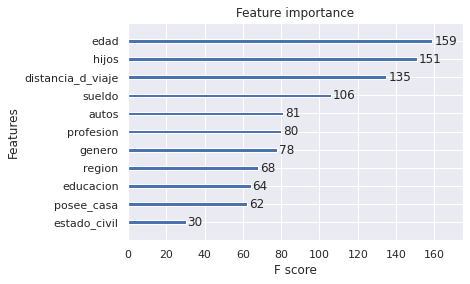

In [ ]:
plot_importance(xgb_cl_best)

In [ ]:
#plot_tree(xgb_cl_best,num_trees=0,figsize=(10,10))

format = 'png' #You should try the 'svg'

image = xgb.to_graphviz(xgb_cl_best)

#Set a different dpi (work only if format == 'png')
image.graph_attr = {'dpi':'2000'}

image.render('arboles_xgb', format = format)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.220869 to fit


'arboles_xgb.png'

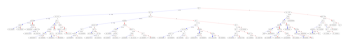

In [ ]:
plot_tree(xgb_cl_best,num_trees=0,)
#plt.show()

In [ ]:
num_trees=4

In [ ]:
def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy

def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad

def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad